In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [17]:
df_outlier=pd.read_csv("Cleaned_Data.csv")
df_outlier.head()


,url,bedrooms,bathrooms,city,location_1,location_2,addres,price,size,price_per_unit,type,unit,rent_or_sale,web_name,source,lat,lon
0,https://www.propertyfinder.ae/en/plp/buy/townh...,4,4,Dubai,Tilal Al Ghaf,Tilal Al Ghaf,"Aura, Tilal Al Ghaf, Dubai",4000000,229,17467.25,residential,Townhouse,sale,property finder,scraped,25.023709,55.223482
1,https://www.propertyfinder.ae/en/plp/buy/apart...,1,1,Dubai,Jumeirah,La Mer,"Port de La Mer, La Mer, Jumeirah, Dubai",2200000,76,28947.37,residential,Apartment,sale,property finder,scraped,25.206960,55.247497
2,https://www.propertyfinder.ae/en/plp/buy/apart...,2,2,Dubai,Jumeirah,La Mer,"Le Pont, La Mer, Jumeirah, Dubai",5000000,113,44247.79,residential,Apartment,sale,property finder,scraped,25.206960,55.247497
3,https://www.propertyfinder.ae/en/plp/buy/apart...,2,2,Dubai,Jumeirah Village Circle,Jumeirah Village Circle,"Maimoon Gardens by Fakhruddin Properties, Jume...",1510000,90,16777.78,residential,Apartment,sale,property finder,scraped,25.071164,55.210889
4,https://www.propertyfinder.ae/en/plp/buy/villa...,4,4,Dubai,Dubai Hills Estate,Maple at Dubai Hills Estate,"Maple 3, Maple at Dubai Hills Estate, Dubai Hi...",4250000,230,18478.26,residential,Villa,sale,property finder,scraped,25.122615,55.275120


In [18]:
df_outlier.shape

(263666, 17)

In [19]:
df_outlier.describe()


,bedrooms,bathrooms,price,size,price_per_unit,lat,lon
count,263666.000000,263666.000000,2.636660e+05,2.636660e+05,2.636660e+05,263666.000000,263666.000000
mean,2.010733,2.674949,3.147434e+06,3.181982e+02,1.163859e+04,25.302289,54.859817
std,1.516330,1.773060,1.205267e+07,8.383523e+03,7.407314e+04,2.266660,4.625227
min,0.000000,0.000000,8.300000e+01,1.000000e+00,0.000000e+00,24.844915,-1.837131
25%,1.000000,2.000000,1.083300e+04,7.900000e+01,8.966000e+01,25.062755,55.154762
50%,2.000000,2.000000,6.508190e+05,1.250000e+02,7.792210e+03,25.100208,55.257375
75%,3.000000,4.000000,2.580000e+06,2.150000e+02,1.801802e+04,25.189427,55.278283
max,21.000000,21.000000,1.000000e+09,2.900700e+06,3.500000e+07,53.263886,55.540827


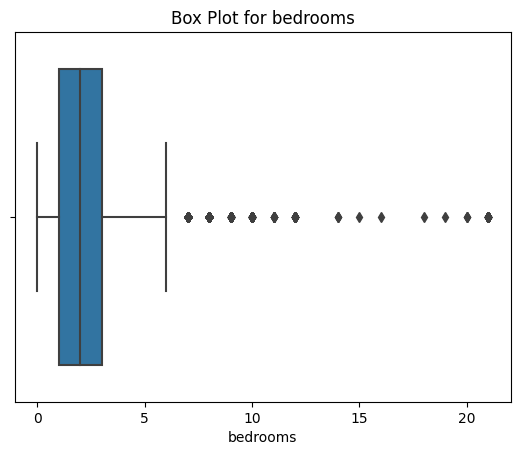

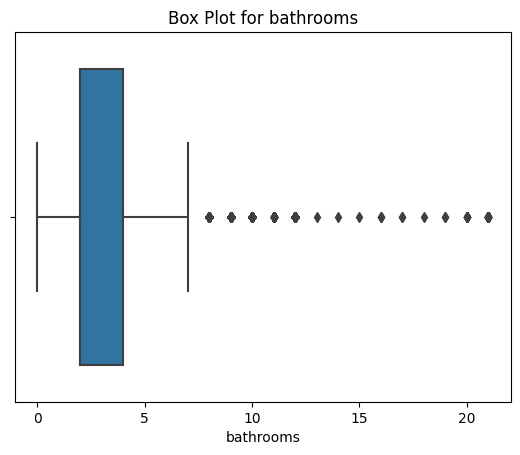

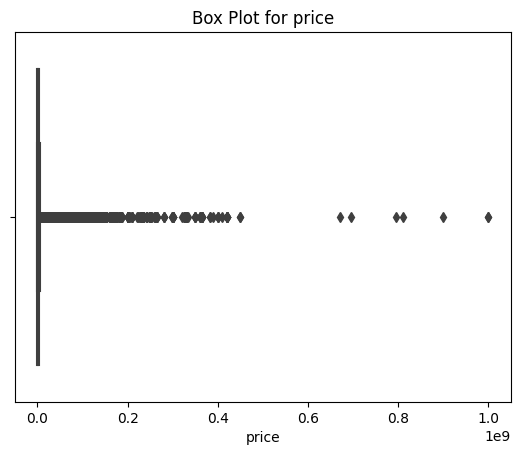

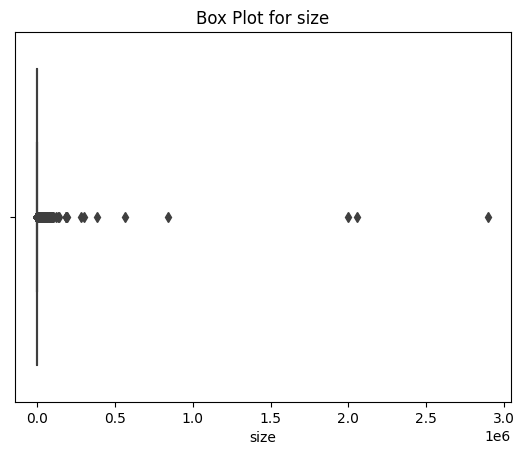

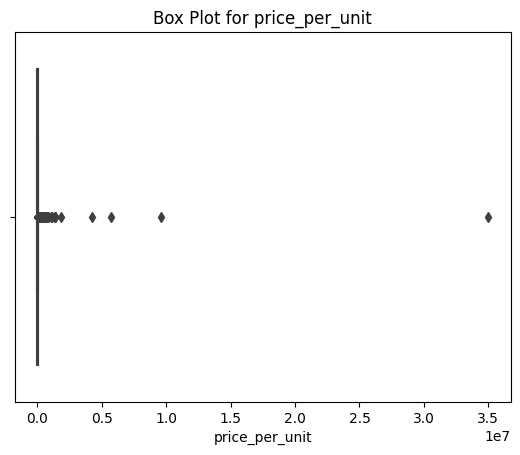

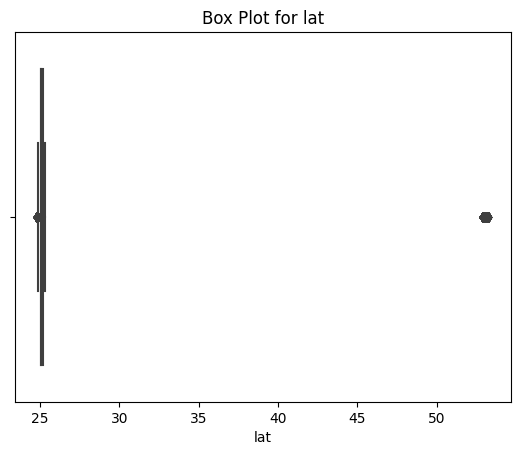

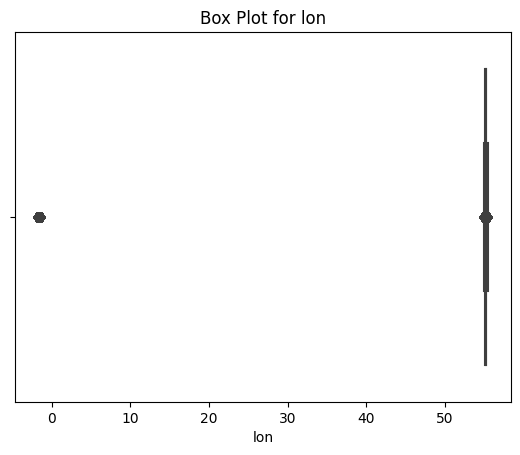

In [22]:
#Boxplot
numerical_columns = ["bedrooms", "bathrooms", "price", "size", "price_per_unit", "lat", "lon"]
for column in numerical_columns:
    sns.boxplot(x=df_outlier[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

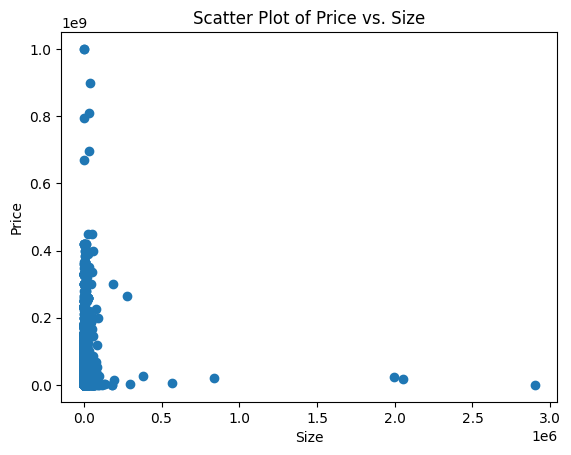

In [23]:
#Scatterplot
plt.scatter(df_outlier['size'], df_outlier['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Size')
plt.show()


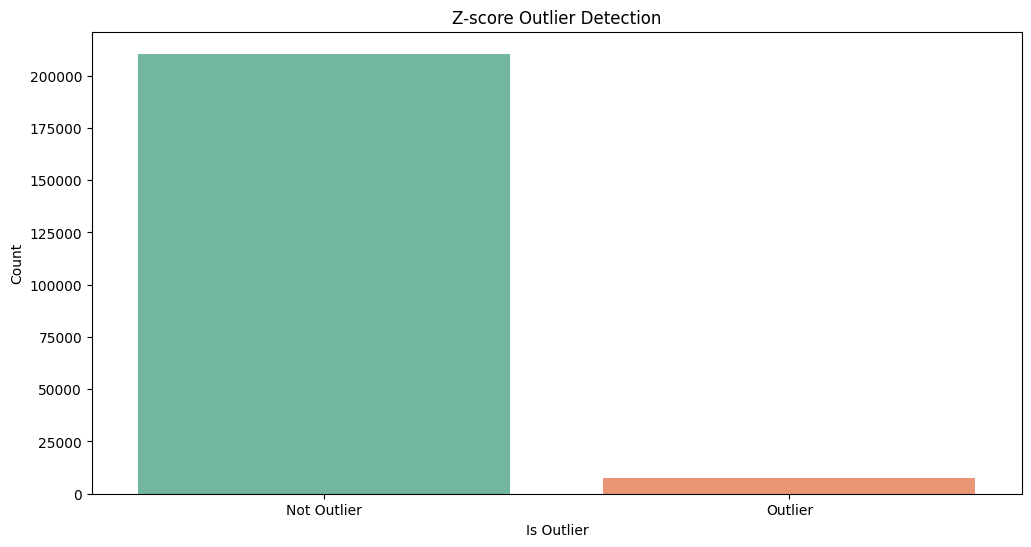

In [56]:
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (df_cleaned[column] - df_cleaned[column].mean()) / df_cleaned[column].std()

z_score_threshold = 3


outliers = pd.DataFrame()

for column in numerical_columns:
    outliers[column] = z_scores[column].abs() > z_score_threshold

outliers['is_outlier'] = outliers.any(axis=1)
plt.figure(figsize=(12, 6))
sns.countplot(data=outliers, x='is_outlier', palette='Set2')
plt.title('Z-score Outlier Detection')
plt.xlabel('Is Outlier')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Outlier', 'Outlier'])
plt.show()


df_no_outliers = df_cleaned[~outliers['is_outlier']]

In [40]:
def outliers(df, numerical_columns):
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    listt = df.index[(df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)]
    return listt

In [41]:
index_list = []
for i in ['bedrooms', 'bathrooms', 'price', 'size', 'price_per_unit', 'lat', 'lon']:
    index_list.extend(outliers(df_outlier, i))

In [42]:
index_list

[141,
 266,
 311,
 376,
 378,
 529,
 659,
 754,
 755,
 839,
 1191,
 1223,
 1507,
 1520,
 1539,
 1574,
 1699,
 1797,
 1815,
 1871,
 2082,
 2565,
 2574,
 2603,
 2604,
 2650,
 2686,
 2792,
 2945,
 3251,
 3315,
 3500,
 3501,
 3741,
 3769,
 4110,
 4147,
 4385,
 4972,
 5206,
 5304,
 5547,
 5758,
 5837,
 5910,
 5912,
 6014,
 6133,
 6258,
 6455,
 6492,
 6499,
 6647,
 6723,
 6760,
 6862,
 7094,
 7314,
 7344,
 7382,
 7717,
 7761,
 7829,
 7968,
 8026,
 8028,
 8331,
 8387,
 8863,
 8917,
 8923,
 9192,
 9207,
 9305,
 9308,
 9353,
 9515,
 9527,
 9528,
 9594,
 9655,
 9680,
 10036,
 10246,
 11068,
 11211,
 11449,
 11595,
 11811,
 11838,
 11935,
 12064,
 12139,
 12322,
 12491,
 13007,
 13147,
 13324,
 13358,
 13615,
 13677,
 13686,
 13707,
 13785,
 13798,
 13830,
 13916,
 14174,
 14487,
 14520,
 14578,
 14656,
 14659,
 14784,
 14786,
 15023,
 15135,
 15144,
 15381,
 15413,
 15522,
 15675,
 15762,
 16085,
 16153,
 16249,
 16252,
 16254,
 16325,
 16433,
 16556,
 16658,
 16743,
 16791,
 16833,
 17313,
 173

In [44]:
def remove_outliers(df,listt):
    listt = sorted(set(listt))
    df = df.drop(listt)
    return df

In [45]:
df_cleaned = remove_outliers(df_outlier, index_list)

In [46]:
df_cleaned.shape

(218146, 17)

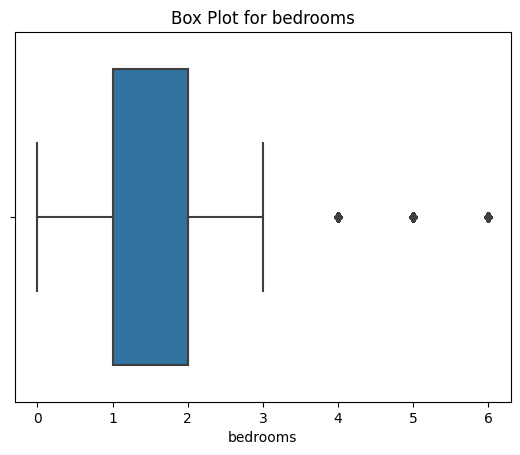

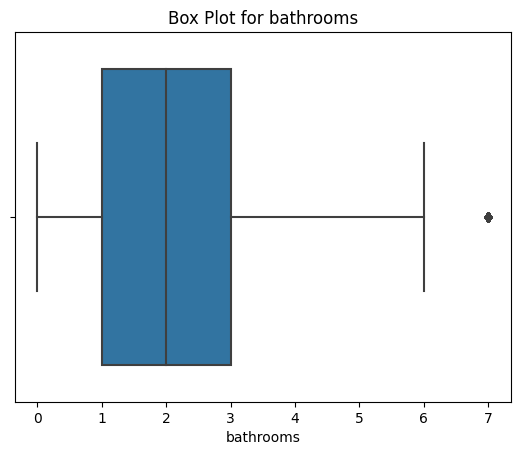

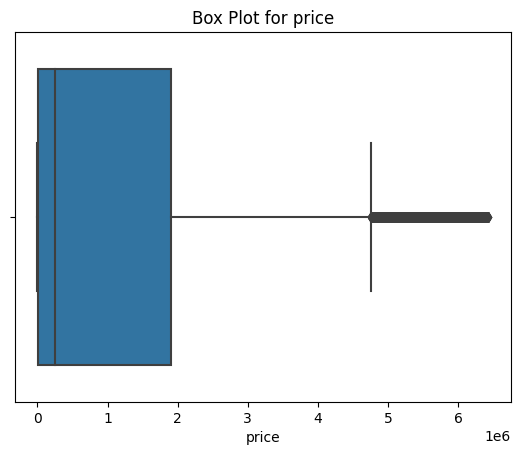

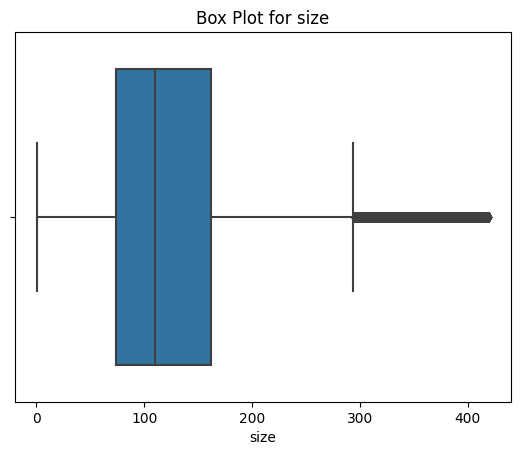

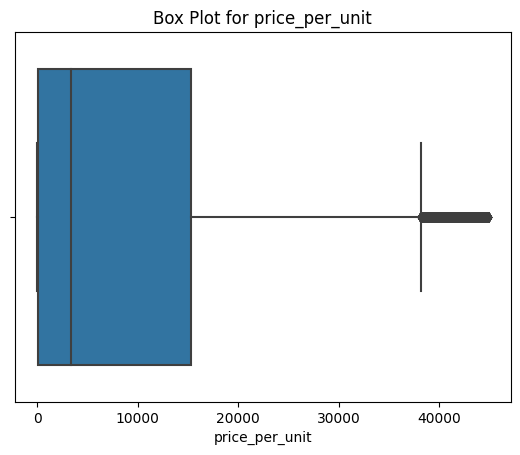

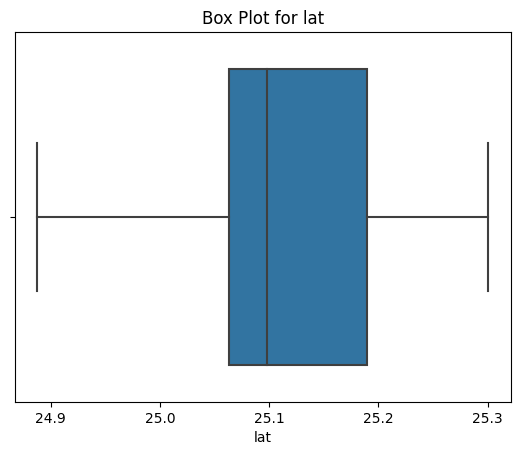

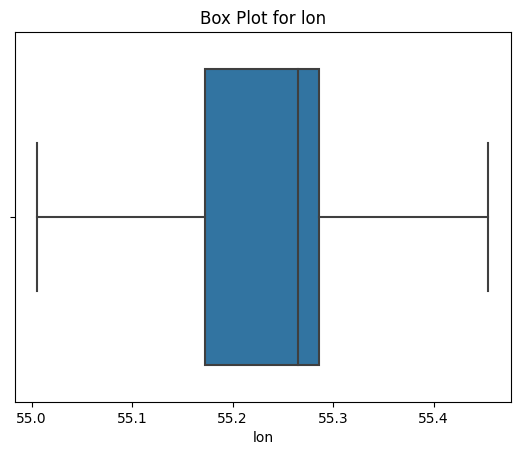

In [47]:
#Boxplot
numerical_columns = ["bedrooms", "bathrooms", "price", "size", "price_per_unit", "lat", "lon"]
for column in numerical_columns:
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [50]:
df_cleaned.to_csv('Cleaned_Data_Outliers.csv', index=False)